/storage/.venv/lib/python3.10/site-packages/pytorch_forecasting/models/base_model.py:30: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
INFO:vierlinden.data.loader:Data loaded successfully from /storage/projects/RIWWER/data/Vierlinden
INFO:vierlinden.data.loader:Sensor and target data merged successfully.
INFO:vierlinden.data.loader:NaN values processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.


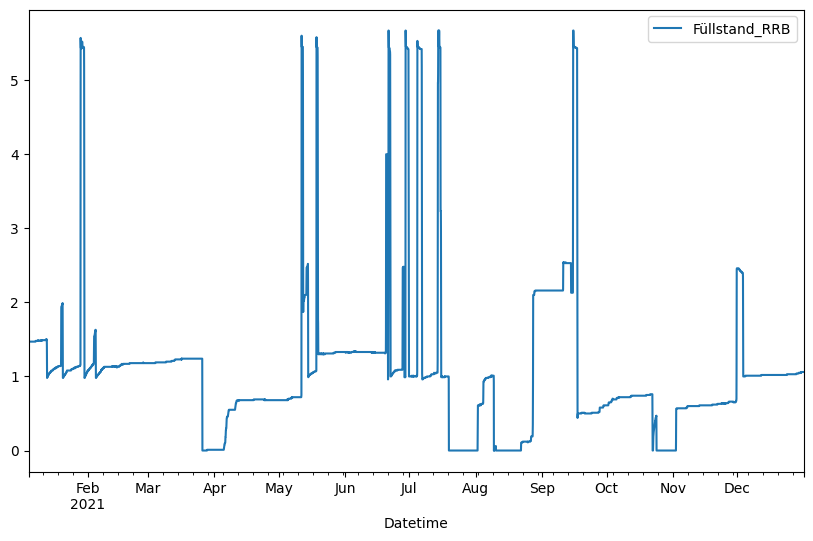

In [1]:
from main import main, context_length, prediction_length
from vierlinden.data.loader import VierlindenDataProcessor
from vierlinden.config import model_output_path

target = "Füllstand_RRB"
model_filepath = model_output_path + "/NHiTS"  + target + "_model.pt"

dp = VierlindenDataProcessor()
df = dp.load_processed_data()
df = dp.prepare_for_target(df, target)
dp.plot_target_col(target)

## Training

INFO:vierlinden.data.loader:Data loaded successfully from /storage/projects/RIWWER/data/Vierlinden
INFO:vierlinden.data.loader:Sensor and target data merged successfully.
INFO:vierlinden.data.loader:NaN values processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.
INFO:vierlinden.model.model:Training and validation data and data loaders created successfully.
Global seed set to 42
You are using a CUDA device ('NVIDIA A100 80GB PCIe') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Finding best initial lr: 100%|██████████| 100/100 [00:01<00:00, 73.67it/s]
INFO:vierlinden.model.model:Start setting up trainer and network.
Global seed set to 42
INFO:vierlinden.model.model:Setup succesful. Starting t

Optimal learning rate for Füllstand_RRB: 0.005623413251903493
Epoch 0: 100%|██████████| 193/193 [00:24<00:00,  7.81it/s, v_num=0, train_loss_step=4.050, val_loss=3.660, train_loss_epoch=3.700]

Metric val_loss improved. New best score: 3.660


Epoch 2: 100%|██████████| 193/193 [00:24<00:00,  7.91it/s, v_num=0, train_loss_step=4.160, val_loss=3.570, train_loss_epoch=3.350]

Metric val_loss improved by 0.089 >= min_delta = 0.0001. New best score: 3.572


Epoch 3: 100%|██████████| 193/193 [00:24<00:00,  7.82it/s, v_num=0, train_loss_step=5.430, val_loss=3.530, train_loss_epoch=3.320]

Metric val_loss improved by 0.045 >= min_delta = 0.0001. New best score: 3.526


Epoch 4:   0%|          | 0/193 [00:00<?, ?it/s, v_num=0, train_loss_step=5.430, val_loss=3.530, train_loss_epoch=3.320]          

Swapping scheduler `ReduceLROnPlateau` for `SWALR`


Epoch 6: 100%|██████████| 193/193 [00:26<00:00,  7.38it/s, v_num=0, train_loss_step=3.750, val_loss=3.520, train_loss_epoch=3.300]

Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 3.523


Epoch 16: 100%|██████████| 193/193 [00:30<00:00,  6.24it/s, v_num=0, train_loss_step=1.420, val_loss=3.570, train_loss_epoch=3.280]

Monitored metric val_loss did not improve in the last 10 records. Best score: 3.523. Signaling Trainer to stop.


Epoch 16: 100%|██████████| 193/193 [00:31<00:00,  6.21it/s, v_num=0, train_loss_step=1.420, val_loss=3.570, train_loss_epoch=3.280]


INFO:vierlinden.model.model:Training procedure completed.
INFO:vierlinden.model.model:Cleaning up logging files.
INFO:vierlinden.model.model:Logging files cleaned up.


[3.7020199298858643, 3.4837067127227783, 3.351771593093872, 3.315030574798584, 3.2984297275543213, 3.305063247680664, 3.298982858657837, 3.285705804824829, 3.291297197341919, 3.294358015060425, 3.305720329284668, 3.2958152294158936, 3.270249843597412, 3.2832136154174805, 3.2872190475463867, 3.2846505641937256, 3.280656337738037]
[3.6601946353912354, 3.6765623092651367, 3.571640968322754, 3.5261592864990234, 3.6101467609405518, 3.5630929470062256, 3.5233347415924072, 3.5343122482299805, 3.5283615589141846, 3.763050079345703, 3.602163553237915, 3.5488874912261963, 3.5460376739501953, 3.537984848022461, 3.5817205905914307, 3.5506086349487305, 3.5701136589050293]


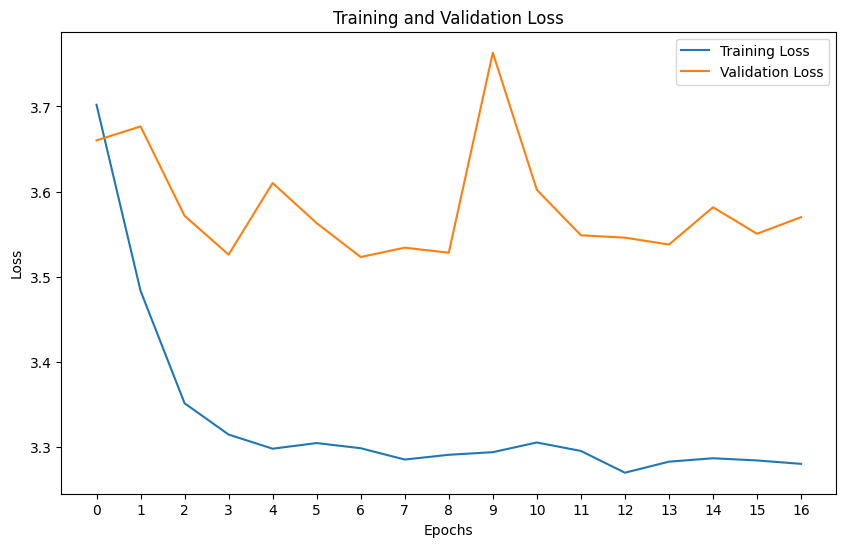

In [2]:
training_wrapper, test_df = main(target)
training_wrapper.save_trained_model(model_filepath)

print(training_wrapper.metrics_callback.metrics["train_loss"])
print(training_wrapper.metrics_callback.metrics["val_loss"])

training_wrapper.plot_training_result()

## Testing

In [3]:
from vierlinden.model.model import NHiTSTrainingWrapper, NHiTSPredictionWrapper

model = NHiTSTrainingWrapper.load_trained_model(model_filepath)
prediction_wrapper = NHiTSPredictionWrapper(model, context_length=context_length, prediction_length=prediction_length, target_col=target)

if test_df is None:
    df = dp.load_processed_data()
    df = dp.prepare_for_target(df, target)
    training_df, test_df = dp.split_data(df)
    
prediction_df = prediction_wrapper.predict(test_df)
mase = prediction_wrapper.calculate_mase_loss()

print("MASE = ", mase)

/storage/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


MASE =  1.428308457732099


In [4]:
prediction_df.iloc[110:120]

,Datetime,Schieber Position_pval,Oberwasser_pval,Unterwasser_pval,Durchflumenge_pval,Berechnete Durchflussmenge_pval,Fllstand SWS_pval,Fllstand RWS_pval,Strom P1_pval,Strom P2_pval,...,Fllstand Pumpensumpf_pval,Strom Pumpe 1_pval,Strom Pumpe 2_pval,Fllstand Pumpensumpf_pval1,Strom Pumpe 1_pval1,Strom Pumpe 2_pval1,Strom Pumpe 3_pval,Niederschlag,Füllstand_RRB,Predicted Forecast
110,2021-11-30 10:00:00,100.0,18.578947,12.140625,41.424528,39.932039,102.900000,35.000000,7.000000,0.000000,...,47.066667,1.064516,0.677419,91.021739,3.548387,0.0,1.0,0.900000,0.67,"[0.6597571969032288, 0.659734308719635, 0.6597..."
111,2021-11-30 11:00:00,100.0,18.518072,12.318841,41.348624,38.694444,75.859649,35.000000,5.842105,0.000000,...,48.367521,0.580645,0.000000,91.051948,0.000000,0.0,1.0,0.885366,0.67,"[0.6697776913642883, 0.6696915626525879, 0.669..."
112,2021-11-30 12:00:00,100.0,20.239437,13.214286,46.018868,46.231481,75.633333,35.000000,5.066667,0.000000,...,47.400000,0.580645,1.000000,89.252632,3.709677,0.0,1.0,1.237500,0.67,"[0.6698113679885864, 0.6697559356689453, 0.669..."
113,2021-11-30 13:00:00,100.0,34.907216,22.023256,130.716667,109.172414,106.850000,35.000000,4.616667,16.666667,...,68.120879,3.540984,5.078125,109.024096,9.016393,0.0,1.0,2.779592,0.67,"[0.6698404550552368, 0.6698331236839294, 0.669..."
114,2021-11-30 14:00:00,100.0,39.345679,24.333333,157.921053,129.577982,112.516667,35.416667,3.716667,25.150000,...,86.897436,5.492308,5.000000,126.337079,10.000000,0.0,1.0,2.937391,0.69,"[0.6698408722877502, 0.6698575019836426, 0.669..."
115,2021-11-30 15:00:00,100.0,36.766234,22.929577,142.059829,115.964286,118.483333,36.000000,4.000000,16.633333,...,97.038961,5.343284,5.000000,143.558824,10.000000,0.0,1.0,2.153571,0.70,"[0.689832329750061, 0.6897344589233398, 0.6898..."
116,2021-11-30 16:00:00,100.0,39.385542,24.225000,158.060870,131.165138,117.816667,36.500000,3.933333,22.133333,...,103.797101,5.380282,5.000000,153.394737,10.000000,0.0,1.0,2.651282,1.05,"[0.699921727180481, 0.6999537944793701, 0.7001..."
117,2021-11-30 17:00:00,100.0,27.098765,17.081081,84.297297,73.449541,134.150000,37.000000,5.750000,1.833333,...,106.387097,5.109375,5.000000,150.426966,10.000000,0.0,1.0,0.975000,2.40,"[1.0526906251907349, 1.0521197319030762, 1.052..."
118,2021-11-30 18:00:00,100.0,22.397436,14.292683,57.223214,54.355140,134.183333,37.000000,5.800000,3.783333,...,104.507246,5.132353,5.000000,111.203883,10.000000,0.0,1.0,1.688000,2.45,"[2.411449909210205, 2.4088938236236572, 2.4114..."
119,2021-11-30 19:00:00,100.0,28.647887,17.860759,91.504505,81.609091,129.883333,37.000000,5.200000,5.466667,...,107.149254,5.032258,5.000000,89.215909,5.645161,0.0,1.0,1.187755,2.46,"[2.4483065605163574, 2.451110363006592, 2.4542..."


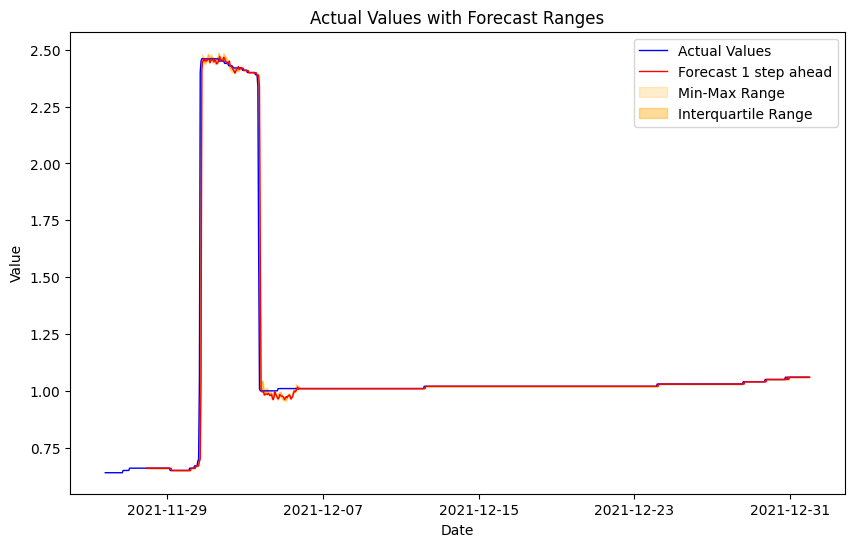

In [5]:
prediction_wrapper.plot_forecast_for_all(forecast_step_ahead=1, plot_forecast_distribution=True)

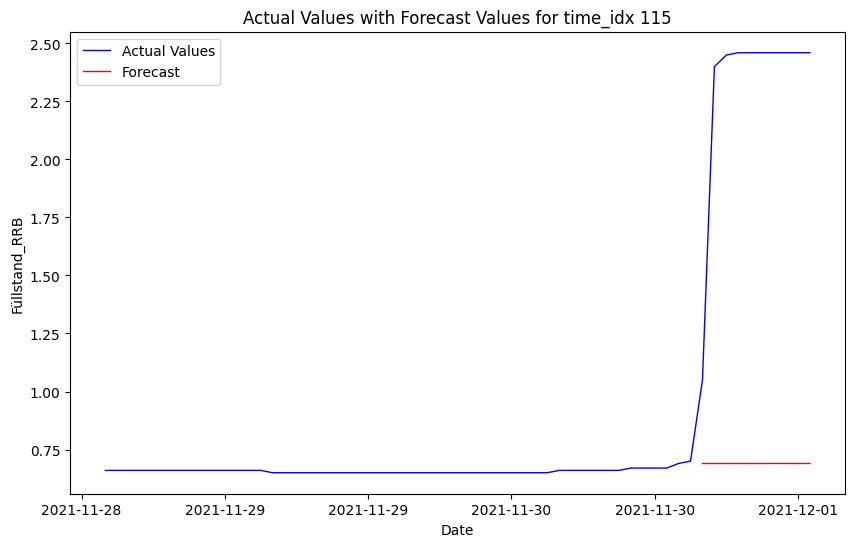

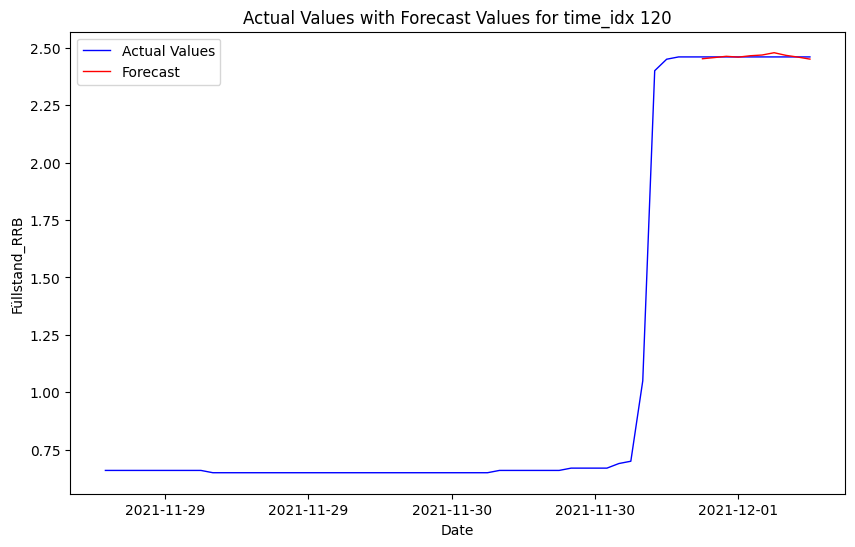

In [6]:
prediction_wrapper.plot_forecast_per_time_idx(115)
prediction_wrapper.plot_forecast_per_time_idx(120)